<a href="https://colab.research.google.com/github/potgieterphiline/UdemyTrainingCode/blob/main/DecisionTree2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import matplotlib.pyplot as plt


In [ ]:
test = pd.read_csv("/content/sample_data/Census_income_test.csv")
train = pd.read_csv("/content/sample_data/Census_income_train.csv")

In [ ]:
train.head()

,Age,Workclass,fnlwgt,Education,Education-num,Marital status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
train.isnull().sum()

,0
Age,0
Workclass,0
fnlwgt,0
Education,0
Education-num,0
Marital status,0
Occupation,0
Relationship,0
Race,0
Sex,0


In [ ]:
clean_train = train[train["Workclass"].str.contains("\?") == False]

In [ ]:
len(clean_train)

30724

In [ ]:
clean_train = clean_train[clean_train["Occupation"].str.contains("\?") == False]

In [ ]:
len(clean_train)

30717

In [ ]:
clean_train = clean_train[clean_train["Native-country"].str.contains("\?") == False]
len(clean_train)

30161

In [ ]:
clean_train = clean_train.reset_index(drop = True)

In [ ]:
train_dummies = pd.get_dummies(clean_train, drop_first = False)

In [ ]:
train_dummies.head()

,Age,fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,...,Native-country_ Scotland,Native-country_ South,Native-country_ Taiwan,Native-country_ Thailand,Native-country_ Trinadad&Tobago,Native-country_ United-States,Native-country_ Vietnam,Native-country_ Yugoslavia,Income_ <=50K,Income_ >50K
0,39,77516,13,2174,0,40,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
1,50,83311,13,0,0,13,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
2,38,215646,9,0,0,40,False,False,True,False,...,False,False,False,False,False,True,False,False,True,False
3,53,234721,7,0,0,40,False,False,True,False,...,False,False,False,False,False,True,False,False,True,False
4,28,338409,13,0,0,40,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
train_dummies = train_dummies.drop(['Income_ <=50K'], axis = 1)

In [ ]:
train_input = train_dummies.iloc[:,:-1]
train_target = train_dummies.iloc[:,-1]

In [ ]:
test.isnull().sum()

,0
Age,0
Workclass,0
fnlwgt,0
Education,0
Education-num,0
Marital status,0
Occupation,0
Relationship,0
Race,0
Sex,0


In [ ]:
clean_test = test[test["Workclass"].str.contains("\?") == False]
len(clean_test)

15318

In [ ]:
clean_test = clean_test[clean_test["Occupation"].str.contains("\?") == False]
len(clean_test)

15315

In [ ]:
clean_test = clean_test[clean_test["Native-country"].str.contains("\?") == False]
len(clean_test)

15060

In [ ]:
clean_test = clean_test.reset_index(drop = True)

In [ ]:
test_dummies = pd.get_dummies(clean_test, drop_first = False)

In [ ]:
test_input = test_dummies.iloc[:,:-1]
test_target = test_dummies.iloc[:,-1]
test_input

,Age,fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week,Workclass_ ?,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,...,Native-country_ Puerto-Rico,Native-country_ Scotland,Native-country_ South,Native-country_ Taiwan,Native-country_ Thailand,Native-country_ Trinadad&Tobago,Native-country_ United-States,Native-country_ Vietnam,Native-country_ Yugoslavia,Income_ <=50K.
0,25,226802,7,0,0,40,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
1,38,89814,9,0,0,50,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
2,28,336951,12,0,0,40,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,44,160323,10,7688,0,40,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,18,103497,10,0,0,30,True,False,False,False,...,False,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16002,39,215419,13,0,0,36,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
16003,64,321403,9,0,0,40,True,False,False,False,...,False,False,False,False,False,False,True,False,False,True
16004,38,374983,13,0,0,50,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
16005,44,83891,13,5455,0,40,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True


In [ ]:
clf = tree.DecisionTreeClassifier(random_state = 365,ccp_alpha=0.001)

In [ ]:
clf.fit(train_input, train_target)

DecisionTreeClassifier(ccp_alpha=0.001, random_state=365)

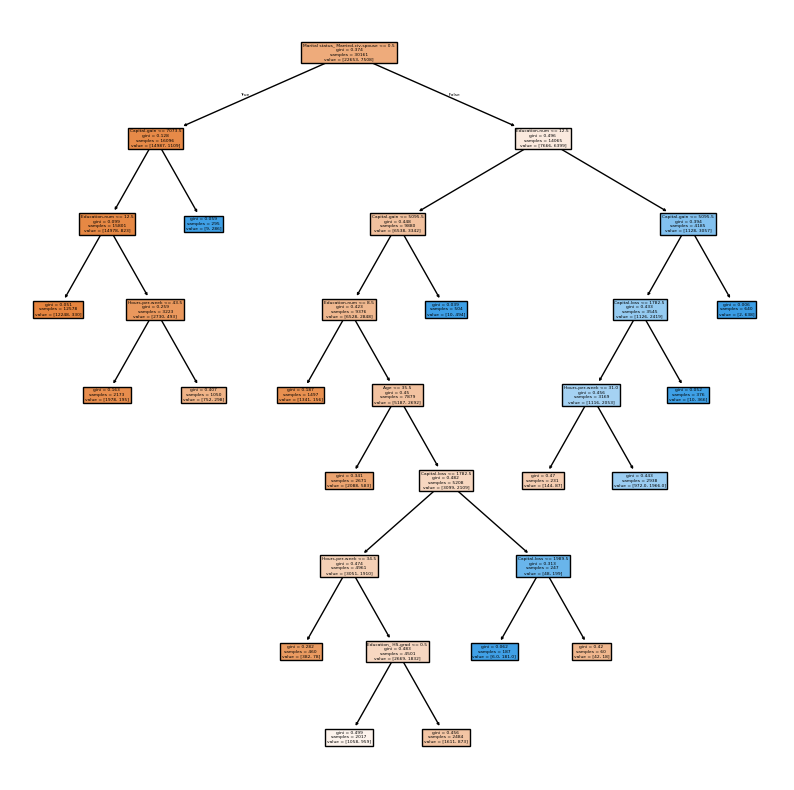

In [ ]:
plt.figure(figsize = (10,10))
tree.plot_tree(clf, filled = True, feature_names = train_input.columns)
plt.show()

In [ ]:
test_dummies = pd.get_dummies(clean_test, drop_first = False)
test_input = test_dummies.drop(['Income_ <=50K.', 'Income_ >50K.'], axis = 1)
test_target = test_dummies['Income_ >50K.']

test_pred = clf.predict(test_input)
print("Accuracy:", accuracy_score(test_target, test_pred))
print(classification_report(test_target, test_pred))

Accuracy: 0.8467463479415671
              precision    recall  f1-score   support

       False       0.86      0.96      0.90     11360
        True       0.79      0.51      0.62      3700

    accuracy                           0.85     15060
   macro avg       0.82      0.73      0.76     15060
weighted avg       0.84      0.85      0.83     15060



In [ ]:
clf2 = RandomForestClassifier(random_state = 365, ccp_alpha=0.0001)
clf2.fit(train_input, train_target)

RandomForestClassifier(ccp_alpha=0.0001, random_state=365)

In [ ]:
test_pred = clf.predict(test_input)

In [ ]:
print(classification_report(test_target, test_pred))

              precision    recall  f1-score   support

       False       0.86      0.96      0.90     11360
        True       0.79      0.51      0.62      3700

    accuracy                           0.85     15060
   macro avg       0.82      0.73      0.76     15060
weighted avg       0.84      0.85      0.83     15060

